In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.drop(columns=['date', 'id', 'zipcode', 'sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


## Условие 1: Задача 1
Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

1. Данные из прошлого дз
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки


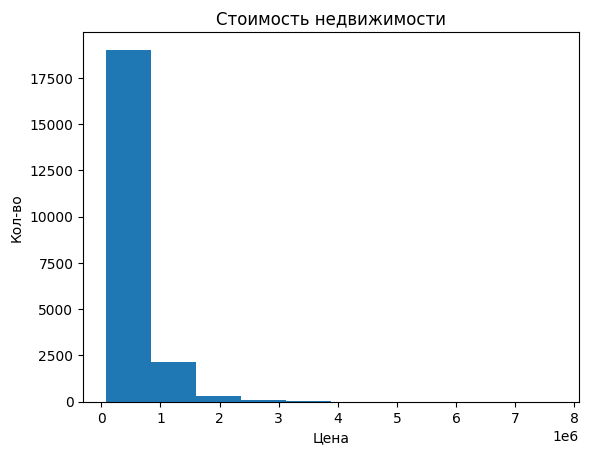

In [4]:
plt.hist(df['price'])
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.title('Стоимость недвижимости');

Большая часть домов стоит до миллиона

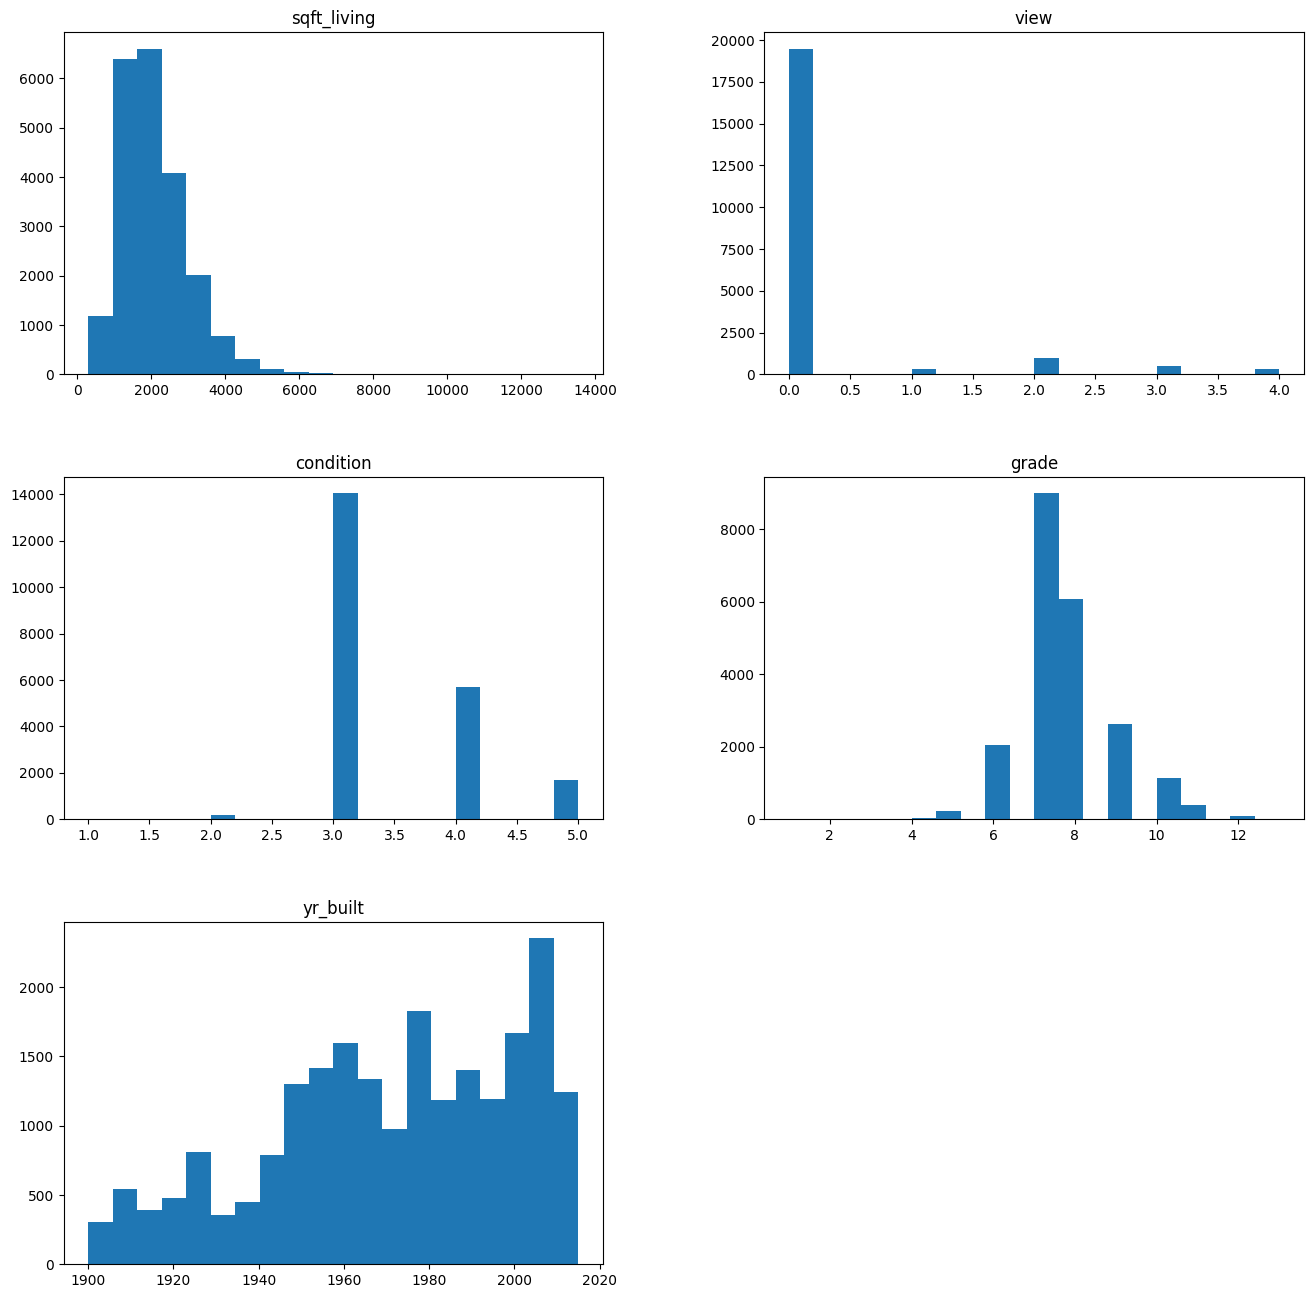

In [5]:
df_num = df.select_dtypes(include=['int']) 
df_num.drop(['bedrooms' , 'sqft_lot', 'waterfront', 'yr_renovated', 'sqft_basement'], axis=1, inplace=True)
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Жилая площадь приемущественно от 1500 до 4000 м2, есть выбросы большой квадратуры.

Годы постройки распределены с увеличением в сторону более новых домов. Тоесть строить больше стали с годами. Бум строительсва пришелся на 2010.

## Условие 2: 2 задача

2. Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы
2. Изучите распределение этажей домов
2. Изучите распределение состояния домов

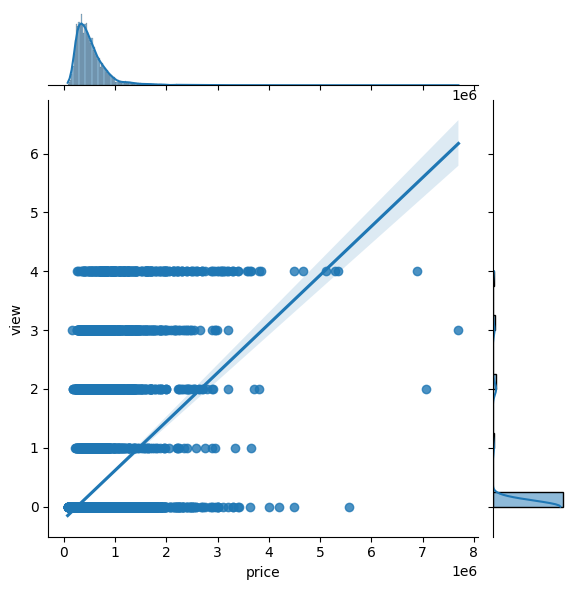

In [6]:
sns.jointplot(x=df['price'], y=df['view'], kind='reg');

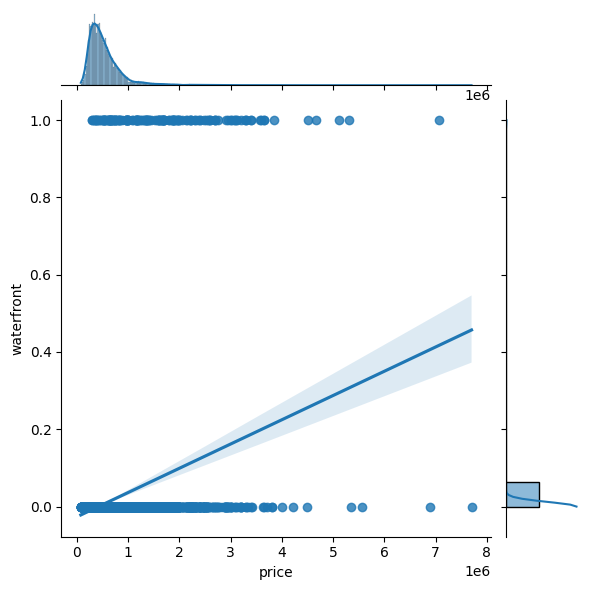

In [7]:
sns.jointplot(x=df['price'], y=df['waterfront'], kind='reg');

Стоисоть домов увеличивается в зависимости от вида, также с видом на набережную более дорогие дома.

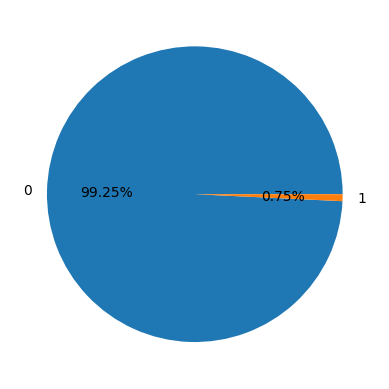

In [8]:
data = df['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%');

Вид на набережную имеет очень небольшое количество домов

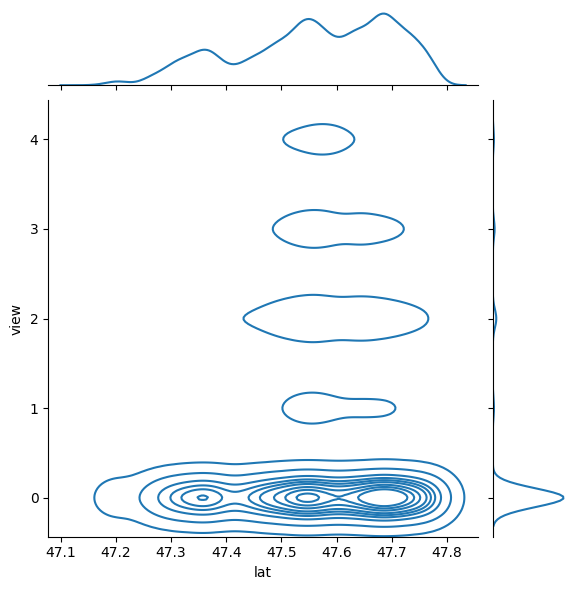

In [9]:
sns.jointplot(x=df['lat'], y=df['view'], kind='kde');

Большая часть домов имеет вид на город. равномерно распределено все в одном районе.

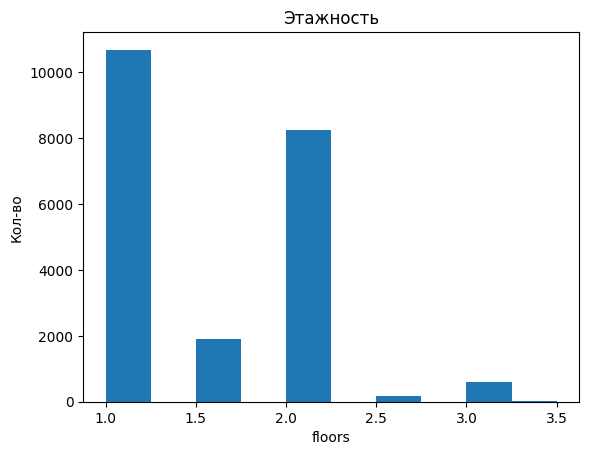

In [10]:
plt.hist(df['floors'])
plt.xlabel('floors')
plt.ylabel('Кол-во')
plt.title('Этажность');

Больше всего домов с одним или двумя этажами.

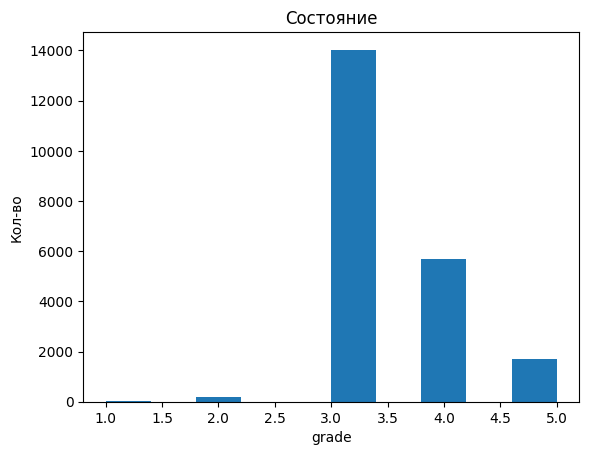

In [11]:
plt.hist(df['condition'])
plt.xlabel('grade')
plt.ylabel('Кол-во')
plt.title('Состояние');

В среднем дома находятся в среднем состоянии, менише в хорошем и отличном. Вместе с тем в плохом состоянии практичестки нет.


## Условие 3: 3 задача

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
#### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

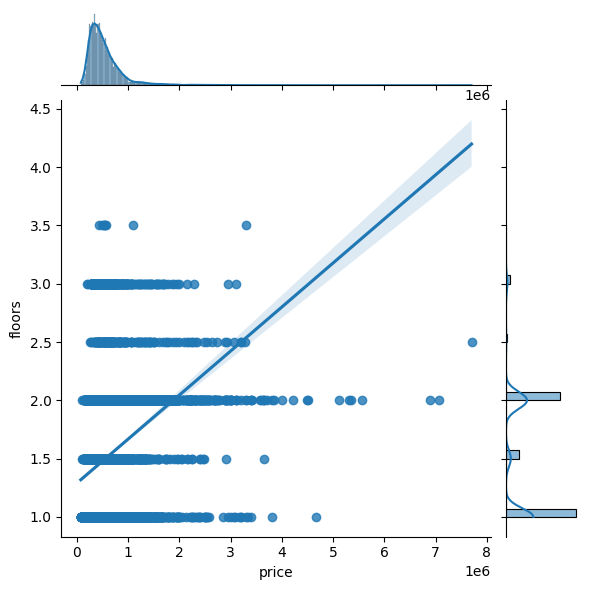

In [12]:
sns.jointplot(x=df['price'], y=df['floors'], kind='reg');

На графике мы видим прямую зависимость стоимости от колитчесва этажей, что логично и понятно, чем больше этажей тем дороже дом.

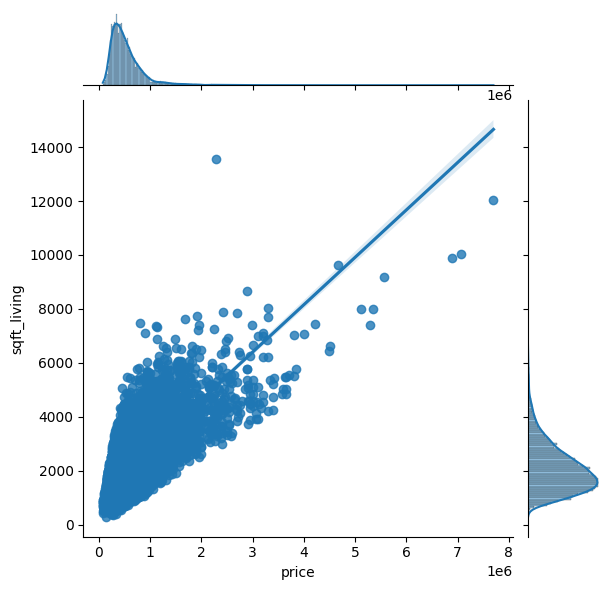

In [13]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Посмотрим на зависимость стоимости от жилой площади, тут мы видим прямую зависимость, чем больше площадь тем выше стоимость.

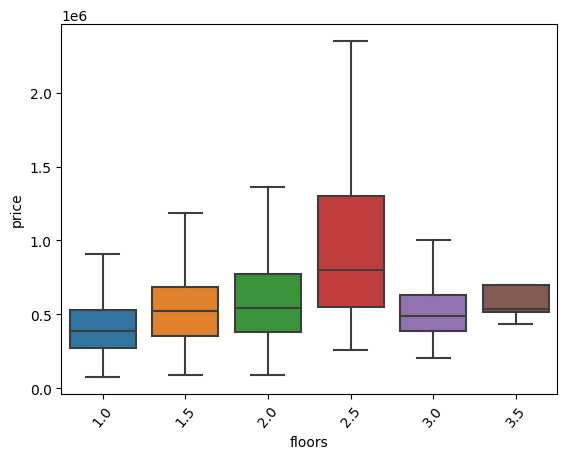

In [14]:
sns.boxplot(x=df['floors'], y=df['price'], showfliers=False)
plt.xticks(rotation=50);

Можем с вами увидеть, что наибольшей популярностью пользуются дома этажностью 2.5, так как спрос рождает предложение. 

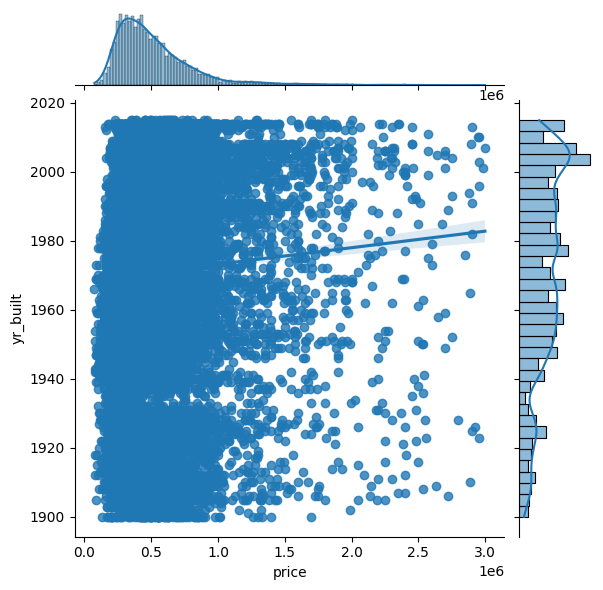

In [15]:
df_cut = df[df['price'] < 3000000]
sns.jointplot(x=df_cut['price'], y=df_cut['yr_built'], kind='reg');

Срез по стоимости домов до трех миллионов показывает что сильной зависимсоти от года постройки нет. 

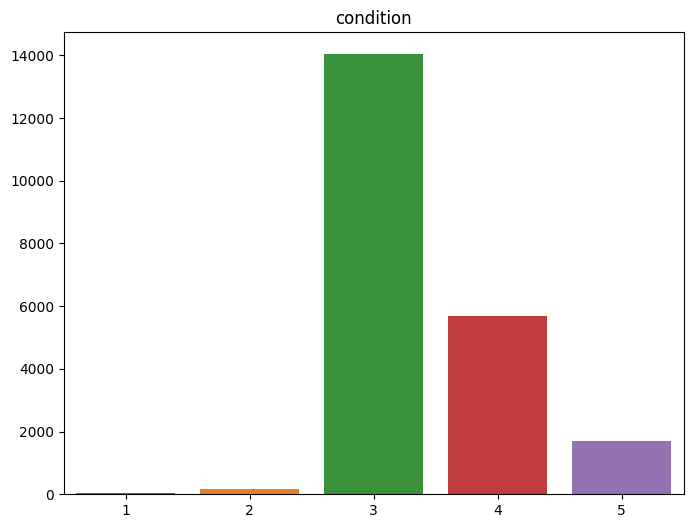

In [16]:

counts = df['condition'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('condition')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show();

На этом графике мы видим, что с оценкой отлично, самые дорогие дома.

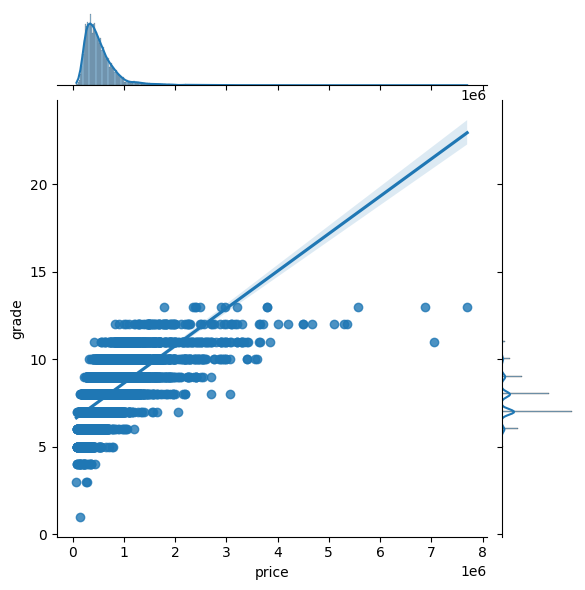

In [17]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Прямая зависимость цены от оценки.

In [18]:

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1) # округление
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # маленькие значения отрубаем
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
price,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.3,0.0,0.0,0.3,0.0
bedrooms,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,0.0,0.0,0.0
bathrooms,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.3,0.5,0.0,0.0,0.0
sqft_living,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.4,0.3,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.0,0.5,0.0,0.0,0.0
waterfront,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,-0.4,0.0,0.0,0.0
grade,0.7,0.4,0.7,0.8,0.0,0.5,0.0,0.3,0.0,1.0,0.0,0.4,0.0,0.0,0.0


Матрица коллеряции потверждает наши предположения о корреляции показателей.

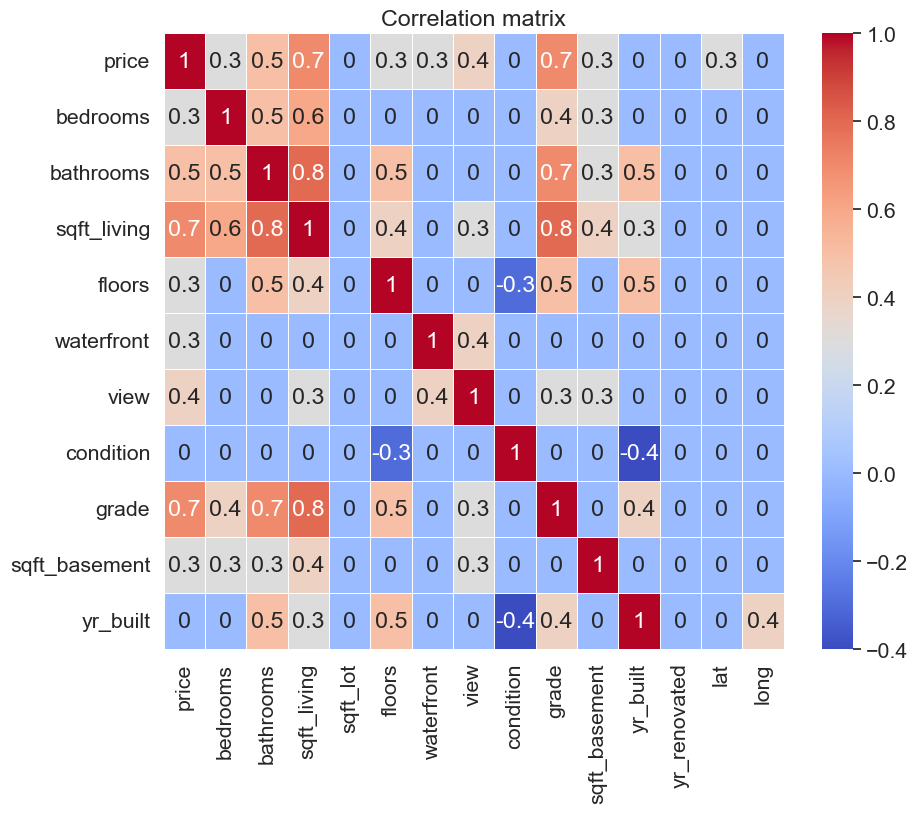

In [19]:
corr_matrix.drop(['sqft_lot' , 'yr_renovated', 'lat', 'long'], inplace=True)
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

Уберем лишние данные и убедимся, что самая большая корреляция у цены с жилой площадью, а также оценкой. Существует сильная зависимость между количеством ванных комнат и желой площадью, обусловленно конечно же потонцеально большим количеством жильцов, оценка также выше у домов с большим количеством ванных.

In [22]:
# import folium
# this_map = folium.Map(prefer_canvas=True) #карта

# def plotDot(point): # нанесение точек
#     folium.CircleMarker(
#         location=[point.lat, point.long],
#         radius=2,
#         popup=point.price # всплывающее значение на точке
#     ).add_to(this_map)
    
# df.apply(plotDot, axis=1)

# this_map.fit_bounds(this_map.get_bounds())

# this_map

На карте моно посмотреть все объекты нашего датасета, расположение и стоимость.
Сиэтл, США. (пришлось убрать, обьем большой для дальнейшего просмотра на GitHab)

In [21]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./MayMap.html')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to ./MayMap.html!


![](MAP.png)

Тепловая карта по стоимости показывает распределение домов в зависимости от цены. Дорогие дома расположены ближе к центру.